In [108]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
# checking the df shape
print('The df has {} rows and {} columns.'.format(*df.shape))

The df has 10841 rows and 13 columns.


In [4]:
# prints out the first row for the dataset
print(df.head(1).transpose())

                                                             0
App             Photo Editor & Candy Camera & Grid & ScrapBook
Category                                        ART_AND_DESIGN
Rating                                                     4.1
Reviews                                                    159
Size                                                       19M
Installs                                               10,000+
Type                                                      Free
Price                                                        0
Content Rating                                        Everyone
Genres                                            Art & Design
Last Updated                                   January 7, 2018
Current Ver                                              1.0.0
Android Ver                                       4.0.3 and up


In [5]:
# prints out names of columns
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB
None


In [7]:
# checking for missing data
print('Nan in each columns' , df.isna().sum(), sep='\n')
# no missing data

Nan in each columns
App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


### Examing 'Price' is Paid

In [8]:
paid_df = df[df['Type'] == 'Paid']
paid_df.head(1).transpose()

,234
App,TurboScan: scan documents and receipts in PDF
Category,BUSINESS
Rating,4.7
Reviews,11442
Size,6.8M
Installs,"100,000+"
Type,Paid
Price,$4.99
Content Rating,Everyone
Genres,Business


In [9]:
# checking for missing data
print('Nan in each columns' , paid_df.isna().sum(), sep='\n')
# no missing data

Nan in each columns
App                 0
Category            0
Rating            153
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         2
Android Ver         1
dtype: int64


In [10]:
paid_df['Price'].unique()

array(['$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

### Examining 'Paid' is Free 

In [11]:
free_df = df[df['Type'] != 'Paid']
free_df.head(1).transpose()

,0
App,Photo Editor & Candy Camera & Grid & ScrapBook
Category,ART_AND_DESIGN
Rating,4.1
Reviews,159
Size,19M
Installs,"10,000+"
Type,Free
Price,0
Content Rating,Everyone
Genres,Art & Design


In [12]:
# checking for missing data
print('Nan in each columns' , free_df.isna().sum(), sep='\n')
# no missing data

Nan in each columns
App                  0
Category             1
Rating            1321
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          6
Android Ver          1
dtype: int64


In [13]:
free_df['Type'].unique()

array(['Free', nan], dtype=object)

### Cleaning Data

##### Price

In [14]:
df['Price'] = df['Price'].str.replace("$", '')
df['Price'] = df['Price'].astype('float')
df['Price'].unique()

C:\Users\Karina\AppData\Local\Temp/ipykernel_29404/576099831.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace("$", '')


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [15]:
# Examining the price of paid apps
df['Price'][df['Type'] == 'Paid'].describe()

count    800.000000
mean      13.920837
std       57.195358
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

##### Type

In [16]:
df['Type'] = df['Type'].str.replace("0", 'Free')
df['Type'] = df['Type'].fillna('Free')
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

##### Category

In [17]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [18]:
df['Category'] = df['Category'].str.replace("_AND_", ' & ')
df['Category'] = df['Category'].str.title()

In [19]:
df['Category'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Game', 'Family', 'Medical', 'Social', 'Shopping',
       'Photography', 'Sports', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News & Magazines', 'Maps & Navigation', nan],
      dtype=object)

##### Genres

In [20]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

##### Installs

In [21]:
df['Installs'] = df['Installs'].str.replace("+", '')
df['Installs'] = df['Installs'].str.replace(",", '')
df['Installs'] = df['Installs'].astype('int')

C:\Users\Karina\AppData\Local\Temp/ipykernel_29404/1067705021.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace("+", '')


In [22]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [23]:
df.head(1).transpose()

,0
App,Photo Editor & Candy Camera & Grid & ScrapBook
Category,Art & Design
Rating,4.1
Reviews,159
Size,19M
Installs,10000
Type,Free
Price,0.0
Content Rating,Everyone
Genres,Art & Design


##### Size

In [24]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

#### Current Ver

In [25]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

#### Android Ver

In [26]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [27]:
df['Android Ver'] = df['Android Ver'].str.replace(" and up", '')
df['Android Ver'] = df['Android Ver'].str.replace("H", '')

In [28]:
df['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '4.0.3 - 7.1.1', '2.0', '3.2', '4.4W', '7.1',
       '7.0 - 7.1.1', '8.0', '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1',
       nan, '5.0 - 6.0', '1.0', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

##### Last Updated

In [29]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

## Saving the cleaned dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int32         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(8)
memory usage: 1.0+ MB


In [31]:
# checking for missing data
print('Nan in each columns' , df.isna().sum(), sep='\n')
# no missing data

Nan in each columns
App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


# EDA

In [55]:
free_df['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10041, dtype: object

In [71]:
# Function to convert  
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [91]:
def treating_app(x):
    global no_stops
    app_list = []

    for app in x:
        app_list.append(app)

    app = listToString(app_list)
    # Tokenize the article: tokens
    tokens = word_tokenize(app)

    # Convert the tokens into lowercase: lower_tokens
    lower_tokens = [t.lower() for t in tokens]

    # Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]

    english_stops = set(stopwords.words('english'))

    # Remove all stop words: no_stops
    no_stops = [t for t in alpha_only if t not in english_stops]
    
    
    # Create the bag-of-words: bow
    bow = Counter(no_stops)

    # Print the 10 most common tokens
    print(bow.most_common(10))

In [92]:
treating_app(free_df['App'])

[('free', 500), ('app', 327), ('mobile', 213), ('news', 198), ('video', 197), ('live', 185), ('chat', 180), ('photo', 168), ('camera', 133), ('dating', 132)]


In [100]:
print(no_stops)

['photo', 'editor', 'candy', 'camera', 'grid', 'scrapbook', 'coloring', 'book', 'moana', 'u', 'launcher', 'lite', 'free', 'live', 'cool', 'themes', 'hide', 'apps', 'sketch', 'draw', 'paint', 'pixel', 'draw', 'number', 'art', 'coloring', 'book', 'paper', 'flowers', 'instructions', 'smoke', 'effect', 'photo', 'maker', 'smoke', 'editor', 'infinite', 'painter', 'garden', 'coloring', 'book', 'kids', 'paint', 'free', 'drawing', 'fun', 'text', 'photo', 'fonteee', 'name', 'art', 'photo', 'editor', 'focus', 'n', 'filters', 'tattoo', 'name', 'photo', 'editor', 'mandala', 'coloring', 'book', 'color', 'pixel', 'number', 'sandbox', 'art', 'coloring', 'learn', 'draw', 'kawaii', 'characters', 'photo', 'designer', 'write', 'name', 'shapes', 'diy', 'room', 'decor', 'ideas', 'flipaclip', 'cartoon', 'animation', 'ibis', 'paint', 'x', 'logo', 'maker', 'small', 'business', 'boys', 'photo', 'editor', 'six', 'pack', 'men', 'suit', 'superheroes', 'wallpapers', 'backgrounds', 'mcqueen', 'coloring', 'pages', 'h

In [93]:
print ("There are {} words in the combination.".format(len(no_stops)))

There are 31753 words in the combination of all review.


In [101]:
type(no_stops)

list

In [102]:
no_stops = listToString(no_stops)

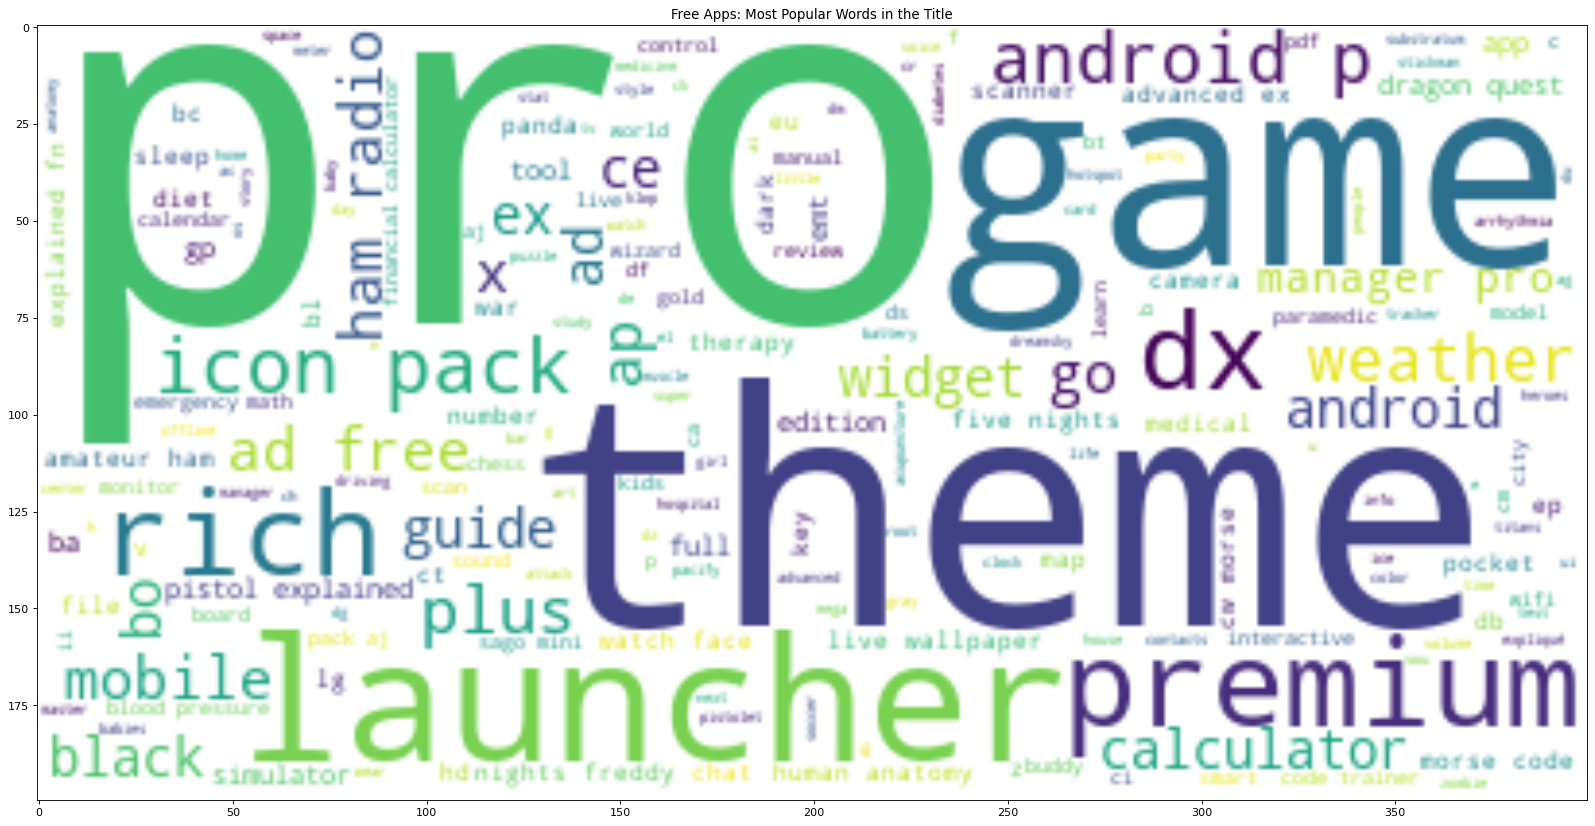

In [118]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(no_stops)

figure(figsize=(25, 20), dpi=80)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Free Apps: Most Popular Words in the Title')
# plt.axis("off")
plt.show()

In [106]:
treating_app(paid_df['App'])

[('pro', 108), ('theme', 28), ('android', 21), ('launcher', 19), ('premium', 18), ('p', 17), ('rich', 16), ('pack', 15), ('ad', 14), ('free', 14)]


In [107]:
print ("There are {} words in the combination.".format(len(no_stops)))

There are 2498 words in the combination.


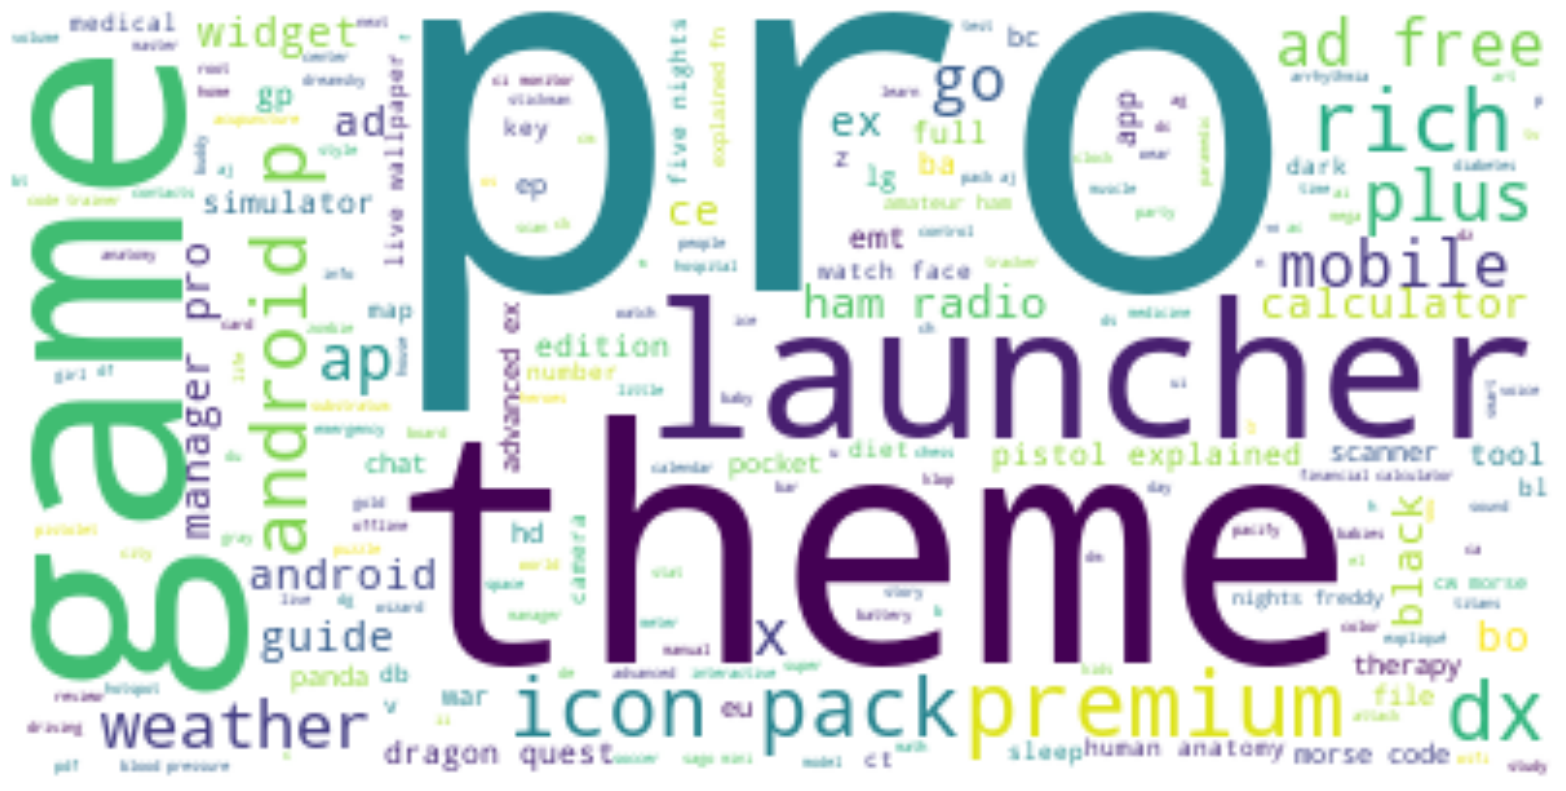

In [109]:
no_stops = listToString(no_stops)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(no_stops)

figure(figsize=(25, 20), dpi=80)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Free Apps: Most Popular Words in the Title')
plt.axis("off")
plt.show()

## Examining Genre

In [74]:
df['Genres'] = df['Genres'].fillna('Uncategorised')

In [75]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [76]:
app_list = []

for app in df['Genres']:
    app_list.append(app)
    
app = listToString(app_list)
print(app)

Art & Design Art & Design;Pretend Play Art & Design Art & Design Art & Design;Creativity Art & Design Art & Design Art & Design Art & Design Art & Design;Creativity Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design;Action & Adventure Art & Design Art & Design Art & Design;Creativity Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design;Creativity Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design Art & Design;Creativity Art & Design Art & Design Art & Design Art & Design Art & Design Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto & Vehicles Auto

In [77]:
# Tokenize the article: tokens
tokens = word_tokenize(app)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]
print(lower_tokens)

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

english_stops = set(stopwords.words('english'))

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]
# print(no_stops)

['art', '&', 'design', 'art', '&', 'design', ';', 'pretend', 'play', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', ';', 'creativity', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', ';', 'creativity', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', ';', 'action', '&', 'adventure', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', ';', 'creativity', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', 'art', '&', 'design', ';', 'creativity', 'art', '&', 'design', 'art', '&', 'design', 'art', '

In [80]:
# Create the bag-of-words: bow
bow = Counter(no_stops)

# Print the 10 most common tokens
print(bow.most_common(10))

[('tools', 843), ('education', 761), ('entertainment', 667), ('action', 520), ('medical', 463), ('business', 460), ('productivity', 424), ('sports', 402), ('personalization', 392), ('communication', 388)]
